<a href="https://colab.research.google.com/github/KhosrojerdiA/Transformer-MT/blob/main/Self_Attention_for_Transformer_Neural_Networks_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#initialize the random vectors
import numpy as np
import math

L, d_k, d_v = 4, 8, 8
#L is the length of the input (My name is Khosro which is 4)
q = np.random.randn(L, d_k) #initializing the normal distibution
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

#4*8

print("Q\n", q) #for every single work, it has 8*1 vector
print("K\n", k)
print("V\n", v)

Q
 [[-0.14850577 -0.38854077  0.04105815  0.2318679   0.48228309 -1.973148
   0.11248419 -0.46860209]
 [ 0.82969571 -1.37349842  0.96092752  0.48046426 -0.47431857 -1.03758776
  -0.29850353 -0.10680182]
 [ 0.21915367  1.58990994 -0.39338964 -0.20344369 -0.94076749 -0.55524636
  -0.07056268  1.08125342]
 [ 1.95410423 -0.18980239  1.08069138  0.31875452 -1.50901968  0.9168811
  -0.53423445 -2.02955373]]
K
 [[-0.33684255  0.16810722 -0.24032345  0.0158989  -0.87029466 -0.57987655
   0.03999305  1.3653062 ]
 [-1.67985584 -0.64685668  0.66350803  0.13000161  1.12966336 -0.0226624
  -0.13960171  0.6337987 ]
 [ 1.53373691  0.11402093 -0.64966298 -0.5848983  -2.61042876  0.81217071
  -2.07867211 -0.23107884]
 [ 1.13672642  0.50400009  1.67598546  0.93200105  0.96124538 -0.87078291
   0.49938286  0.73747774]]
V
 [[ 0.71842184  0.62192839  0.46744253 -0.89474037 -0.01795541 -0.36448671
  -0.43440985 -0.24264572]
 [ 0.51516026  0.23048102  0.03978253 -1.18301522  0.87800389  0.41290312
  -1.13956

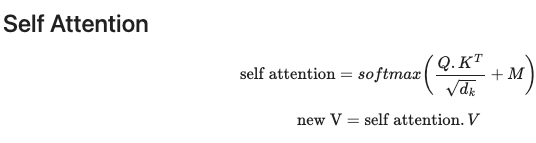

In [ ]:
np.matmul(q, k.T) #sqrt dk for stabalizing the variance

array([[ 0.06769287,  0.83501551, -3.42139604,  1.81264401],
       [ 0.12304809, -0.34359362,  1.25127264,  2.5289331 ],
       [ 2.89890054, -2.0390753 ,  2.7936452 ,  0.54286064],
       [-2.95549429, -5.33856389,  8.35025369,  0.22144327]])

In [ ]:

scaled = np.matmul(q, k.T) / math.sqrt(d_k)
q.var(), k.var(), scaled.var()


(0.8538807574479022, 0.9737500548226917, 1.1570592870558634)

In [ ]:
#Masking: especifing for decoder part
#This is to ensure words don't get context from words generated in the future.
#Not required in the encoders, but required int he decoders


mask = np.tril(np.ones( (L, L) )) #triangular matrix
mask

# first row is: My
#scond row is: My name

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [ ]:

mask[mask == 0] = -np.infty
mask[mask == 1] = 0
mask
#adding inf for softmax operation next

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [ ]:

scaled + mask


array([[ 0.02393304,        -inf,        -inf,        -inf],
       [ 0.04350407, -0.12147869,        -inf,        -inf],
       [ 1.02491611, -0.72092199,  0.98770273,        -inf],
       [-1.04492503, -1.88746736,  2.9522605 ,  0.07829202]])

In [ ]:
#softmax

def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

In [ ]:

attention = softmax(scaled + mask)
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.54115239, 0.45884761, 0.        , 0.        ],
       [0.46773358, 0.08161889, 0.45064752, 0.        ],
       [0.01696352, 0.00730473, 0.92357352, 0.05215823]])

In [ ]:
#new V = self attention.V
new_v = np.matmul(attention, v)
new_v


array([[ 0.71842184,  0.62192839,  0.46744253, -0.89474037, -0.01795541,
        -0.36448671, -0.43440985, -0.24264572],
       [ 0.62515575,  0.4423137 ,  0.27121176, -1.0270146 ,  0.39315338,
        -0.00778324, -0.75796815, -0.08514734],
       [ 0.97719007,  0.69471131, -0.24009288, -0.4943978 ,  0.66964176,
        -0.08529808, -0.66796853, -0.0257951 ],
       [ 1.25776433,  0.82774393, -0.93590161,  0.00146553,  1.24971113,
         0.08111682, -0.74013166,  0.14348452]])

In [ ]:
#Function


def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask=None):
  d_k = q.shape[-1]
  scaled = np.matmul(q, k.T) / math.sqrt(d_k)
  if mask is not None:
    scaled = scaled + mask
  attention = softmax(scaled)
  out = np.matmul(attention, v)
  return out, attention

In [ ]:

values, attention = scaled_dot_product_attention(q, k, v, mask=mask)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)

Q
 [[-0.14850577 -0.38854077  0.04105815  0.2318679   0.48228309 -1.973148
   0.11248419 -0.46860209]
 [ 0.82969571 -1.37349842  0.96092752  0.48046426 -0.47431857 -1.03758776
  -0.29850353 -0.10680182]
 [ 0.21915367  1.58990994 -0.39338964 -0.20344369 -0.94076749 -0.55524636
  -0.07056268  1.08125342]
 [ 1.95410423 -0.18980239  1.08069138  0.31875452 -1.50901968  0.9168811
  -0.53423445 -2.02955373]]
K
 [[-0.33684255  0.16810722 -0.24032345  0.0158989  -0.87029466 -0.57987655
   0.03999305  1.3653062 ]
 [-1.67985584 -0.64685668  0.66350803  0.13000161  1.12966336 -0.0226624
  -0.13960171  0.6337987 ]
 [ 1.53373691  0.11402093 -0.64966298 -0.5848983  -2.61042876  0.81217071
  -2.07867211 -0.23107884]
 [ 1.13672642  0.50400009  1.67598546  0.93200105  0.96124538 -0.87078291
   0.49938286  0.73747774]]
V
 [[ 0.71842184  0.62192839  0.46744253 -0.89474037 -0.01795541 -0.36448671
  -0.43440985 -0.24264572]
 [ 0.51516026  0.23048102  0.03978253 -1.18301522  0.87800389  0.41290312
  -1.13956